In [1]:
import torch
import torch.nn.functional as F
import timm
from PIL import Image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from torchvision.transforms import ToTensor, ToPILImage
from torchvision.models import vgg19,vgg16
from torchvision.utils import save_image
from torchvision import models
from torchsummary import summary



In [90]:
img = Image.open(r"E:\Code\Python\datas\selfWHURS\WHURS19-train\GT\airport_14.jpg")
imgtensor = ToTensor()(img)
imgtensor.shape
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
 
#对于torch 的models就已经包含了vgg19
#在这里pretrained=False，在下面我自己进行了模型预加载，选择Ture,则电脑联网时
#自动会完成下载
vgg_model = vgg19(pretrained=True).features[:].to(device) 
#print(vgg_model)
im = torch.unsqueeze(imgtensor,0).cuda()
layer_name_mapping = {
            '0': "conv1",
            '1': "relu1",
            '2': "conv2",
            '3': "relu1_2",
            '8': "relu2_2",
            '13': "relu3_2",
            '22': "relu4_2",
            '31': "relu5_2"}

layer_name = ["conv1_1","relu1_1","conv1_2","relu1_2","pool1",
"conv2_1","relu2_1","conv2_2","relu2_2","pool2",
"conv3_1","relu3_1","conv3_2","relu3_2","conv3_3","relu3_3","conv3_4","relu3_4","pool3",
"conv4_1","relu4_1","conv4_2","relu4_2","conv4_3","relu4_3","conv4_4","relu4_4","pool4",
"conv5_1","relu5_1","conv5_2","relu5_2","conv5_3","relu5_3","conv5_4","relu5_4","pool5",
]            
fmap = []
x = im
st = 0
stride = 1
for name, module in vgg_model._modules.items():
    #print("vgg_layers name:",name,module)
    x = module(x)
    #print(x.shape)
    fmap.append(x.squeeze(0))
    ToPILImage()(x.squeeze(0)[st:st+3]).save(f"visual/{layer_name[int(name)]}.jpg")
    #plt.imshow(ToPILImage()(x.squeeze(0)))


In [91]:
fmap[5].shape

torch.Size([128, 300, 300])

In [96]:
#输入的应该时feature_maps.shape = (H,W,Channels)
#下图对relu1_2 进行了可视化，有64channels，拼了个了8*8的图
def visualize_feature_map(feature_maps,name):
    #创建特征子图，创建叠加后的特征图
    #param feature_batch: 一个卷积层所有特征图
    # np.squeeze(feature_maps, axis=0)
    print("visualize_feature_map shape:{},dtype:{}".format(feature_maps.shape,feature_maps.dtype))
    #num_maps = feature_maps.shape[2]
    num_maps = 64
    feature_map_combination = []
    plt.figure(figsize=(8, 7))
    # 取出 featurn map 的数量，因为特征图数量很多，这里直接手动指定了。
    #num_pic = feature_map.shape[2]
    row, col = 8,8
    # 将 每一层卷积的特征图，拼接层 5 × 5
    for i in range(0, num_maps):
        feature_map_split = feature_maps[:, :, i]
        feature_map_combination.append(feature_map_split)
        plt.subplot(row, col, i+1)
        plt.imshow(feature_map_split)
        plt.axis('off')
 
    plt.savefig(name+'_feature_map.png') # 保存图像到本地
    plt.show()

visualize_feature_map shape:(75, 75, 512),dtype:float32


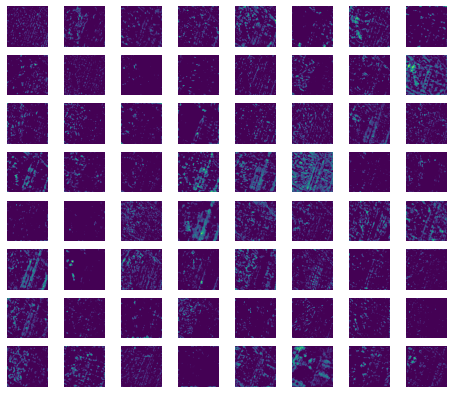

In [97]:
visualize_feature_map((fmap[19]).permute(1,2,0).cpu().detach().numpy(),"conv4_1")

In [106]:
fmap[0].unsqueeze(0).shape

torch.Size([1, 64, 600, 600])

In [108]:
save_image(fmap[1].unsqueeze(0).permute(1,0,2,3),fp= f"relu1_1.png",nrow=8)